In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arun4545","key":"d7f43d352032462a540c4afd72d63bff"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 10.0MB/s]


In [4]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [222]:
X=pd.read_csv('test.csv')

In [223]:
X.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
276,1168,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0000,E60,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S
40,932,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C
393,1285,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
df.duplicated().sum()

0

In [42]:
col=df.columns

In [41]:
df=df.drop(columns=['Ticket','Cabin'])

In [43]:
col

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived'>

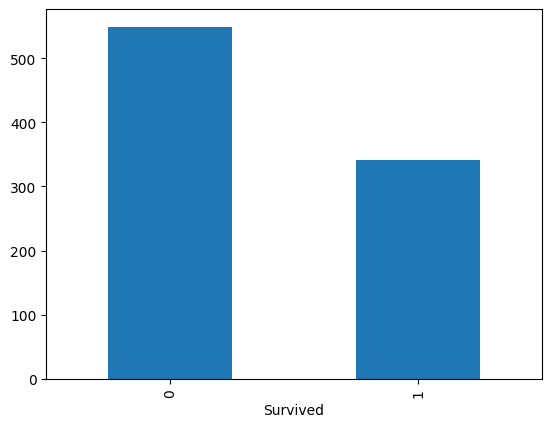

In [21]:
# for i in range(len(col)):
#   plt.subplot(5,2,i+1)
#   plt.title(col[i])
#   plt.hist(df[col[i]])
#   plt.show()
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='Count'>

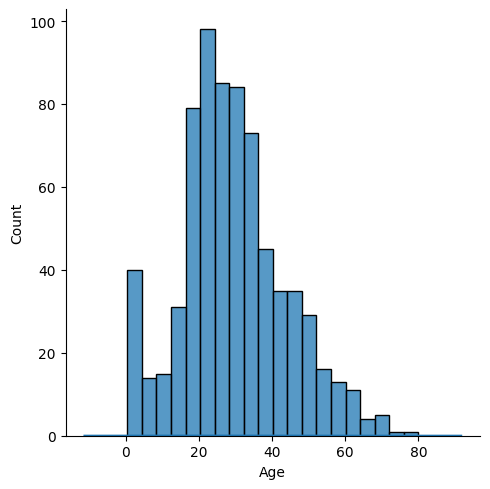

In [25]:
sns.displot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

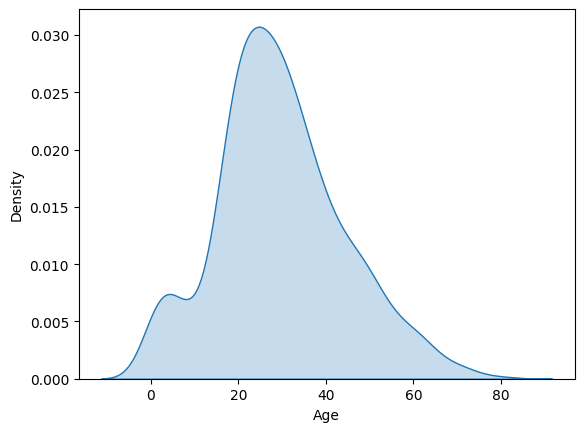

In [30]:
sns.kdeplot(df['Age'],fill=True)

In [31]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [44]:
df.isnull().mean()*100

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Embarked,0.224467


In [39]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [32]:
from sklearn.impute import KNNImputer,SimpleImputer

In [91]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [92]:
x.sample(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
104,3,male,37.0,2,0,7.9250,S
881,3,male,33.0,0,0,7.8958,S


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [126]:
from sklearn.compose import ColumnTransformer

In [127]:
trf1=ColumnTransformer([
    ('si',SimpleImputer(strategy='most_frequent'),[6])
    # ('knn',KNNImputer(),[2]),
    # ('ohe',OneHotEncoder(sparse_output=False),[1,6])
],remainder='passthrough')


In [128]:
x_train=trf1.fit_transform(x_train)
x_test=trf1.transform(x_test)

In [129]:
x_train[:2]

array([['S', 1, 'male', nan, 0, 0, 35.0],
       ['S', 1, 'female', 22.0, 0, 1, 55.0]], dtype=object)

In [130]:
trf2=ColumnTransformer([

    ('knn',KNNImputer(),[3])
    # ('ohe',OneHotEncoder(sparse_output=False),[1,6])
],remainder='passthrough')

In [131]:
x_train=trf2.fit_transform(x_train)
x_test=trf2.transform(x_test)

In [132]:
x_train[:2]

array([[29.630208333333332, 'S', 1, 'male', 0, 0, 35.0],
       [22.0, 'S', 1, 'female', 0, 1, 55.0]], dtype=object)

In [133]:
trf3=ColumnTransformer([


    ('ohe',OneHotEncoder(sparse_output=False),[1,3])
],remainder='passthrough')

In [134]:
x_train=trf3.fit_transform(x_train)
x_test=trf3.transform(x_test)

In [135]:
x_train.shape

(712, 10)

In [136]:
from sklearn.pipeline import make_pipeline

In [138]:
pipe=make_pipeline(trf1,trf2,trf3)

In [139]:
x_train=pipe.fit_transform(x_train)
x_test=pipe.transform(x_test)

In [140]:
x_train.shape

(712, 10)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#MOdels

In [142]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier()
}


In [143]:
print(list(models.values()))

[LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), SVC(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)]


In [144]:
def evalute_model(x_train,y_train,x_test,y_test,models):
  report={}
  for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    report[list(models.keys())[i]]=accuracy
  return report

In [145]:
evalute_model(x_train,y_train,x_test,y_test,models)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8212290502793296,
 'DecisionTreeClassifier': 0.7597765363128491,
 'RandomForestClassifier': 0.8491620111731844,
 'GradientBoostingClassifier': 0.8379888268156425,
 'KNeighborsClassifier': 0.7318435754189944,
 'SVC': 0.6312849162011173,
 'XGBClassifier': 0.7988826815642458}

#Single

In [231]:
from sklearn.metrics import mean_absolute_error

In [236]:
lr=LogisticRegression(max_iter=100,penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)
print(1-mean_absolute_error(y_test,y_pred_lr))


0.8268156424581006


In [243]:
rf=RandomForestClassifier(n_estimators=600,oob_score=True,max_depth=4)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(accuracy_score(y_test,y_pred_rf))
print(rf.oob_score_)
print(1-mean_absolute_error(y_test,y_pred_rf))

0.8715083798882681
0.8047752808988764
0.8715083798882681


In [238]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_score(y_test,y_pred_dt)
print(mean_absolute_error(y_test,y_pred_dt))

0.1452513966480447


In [174]:
gbc=GradientBoostingClassifier(n_estimators=500,max_depth=2)
gbc.fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)
accuracy_score(y_test,y_pred_gbc)

0.8603351955307262

In [182]:
abc=AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
abc.fit(x_train,y_train)
y_pred_abc=abc.predict(x_test)
accuracy_score(y_test,y_pred_abc)


0.8324022346368715

In [190]:
xg=XGBClassifier(n_estimators=500,learning_rate=0.05)
xg.fit(x_train,y_train)
y_pred_xg=xg.predict(x_test)
accuracy_score(y_test,y_pred_xg)

0.8156424581005587

#GridsearchCV

In [191]:
from sklearn.model_selection import GridSearchCV


In [192]:
params_rf={
    'n_estimators':[100,150,200,300,400,500],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'criterion':['gini','entropy'],
    'max_samples':[0.5,0.6,0.7,0.8,0.9,1.0],



}




In [193]:
gr_rf=GridSearchCV(RandomForestClassifier(),param_grid=params_rf)

In [195]:
gr_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'n_estimators': [100, 150, 200, 300, 400, 500]})

In [196]:
y_pred_grf=gr_rf.predict(x_test)
accuracy_score(y_test,y_pred_grf)

0.8435754189944135

In [197]:
gr_rf.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_samples': 0.9, 'n_estimators': 150}

In [249]:
sub.shape

(418,)

In [205]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [208]:
X.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [207]:
X['Fare']=X['Fare'].fillna(X['Fare'].mean())

In [202]:
sub.head(2)

,PassengerId
0,892
1,893


In [210]:
X=X.drop(columns=['Ticket','Cabin','PassengerId','Name'])

In [211]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [220]:
X.shape

(418, 7)

In [212]:
X_test=pipe.transform(X)

In [244]:
y_p=rf.predict(X_test)

In [245]:
y_p.shape

(418,)

In [248]:
sub=X['PassengerId']

In [250]:
sub=pd.DataFrame({'PassengerId':sub,'Survived':y_p})

In [251]:
sub.shape

(418, 2)

In [252]:
sub.to_csv('submission.csv',index=False)